# 통계적 검정 방법 

In [1]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
import math
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline


# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## statsmodels 패키지
- statsmodel 패키지는 추정 및 검정, 회귀분석, 시계열분석 등의 기능을 제공하는 파이썬 패키지
- 예제 데이터셋
- 검정 및 모수추정
- 회귀분석
- 선형회귀
- 강건회귀
- 일반화 선형모형
- 혼합효과모형
- 이산종속변수
- 시계열 분석
- ... 
- 요인분석

### StatsModels에서 제공하는 정규성검정 명령어

- 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : statsmodels.stats.diagnostic.kstest_normal
- 옴니버스 검정(Omnibus Normality test) : statsmodels.stats.stattools.omni_normtest
- 자크-베라 검정(Jarque–Bera test) : statsmodels.stats.stattools.jarque_bera
- 릴리포스 검정(Lilliefors test) : statsmodels.stats.diagnostic.lillifors

### 사이파이 에서 제공하는 정규성검정 명령어

- 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : scipy.stats.ks_2samp
- 샤피로-윌크 검정(Shapiro–Wilk test) : scipy.stats.shapiro
- 앤더스-달링 검정(Anderson–Darling test) : scipy.stats.anderson
- 다고스티노 K-제곱 검정(D'Agostino's K-squared test) : scipy.stats.mstats.normaltest


## 1. t검정
### 1) 일표본 t-검정 (one sample t-test)
- stats.ttest_1samp() 이용(alternative :{‘two-sided’, ‘less’, ‘greater’})
- stats.shapiro 정규성 검정
- numpy의 std는 모표준편차(ddof=0)이 기본값  
- pandas의 std는 표본표준편차(ddof=1)이 기본값 

#### 증명하고자 하는 가설 
아이리포 중학교 1학년의 평균키는 175cm로 알려져있다. 실제로도 그러한지 알아보기 위해 학새 14명을 임의로 뽑아서 키를 측정 하였다. 
해당 데이터를 가지고 아이리포 중학교 1학년 학생의 평균 키는 175cm와 같다고 할 수 있는지 검정해보자
- 귀무가설 : 아이리포 중학교 1학년의 평균키는 175cm이다. 
- 대립가설 : 아이리포 중학교 1학년의 평균키는 175cm가 아니다. 

In [2]:
# 모집단 데이터 
data = [177.3, 182.7, 169.6, 160, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5, 190, 185, 167, 171]

In [3]:
### 데이터의 정규성 검정 : pvalue > 0.05이면 정규성을 따름 
stats.shapiro(data)

ShapiroResult(statistic=0.9641273021697998, pvalue=0.7900116443634033)

#### stats.ttest_1samp 로 검정통계량 계산 

In [4]:
## stats.ttest_1samp 로 검정통계량 계산 

# 유의 수준 0.05 
m_a = 0.05 

# 알려진 평균 확인 
s_mu = 175
one_sample_result = stats.ttest_1samp(data, popmean = s_mu)   

print('t검정 통계량 = %.3f, pvalue = %.3f'%(one_sample_result))  

t검정 통계량 = 0.903, pvalue = 0.383


#### 검정통계량 직접 계산

In [5]:
## 검정통계량 직접 계산

# 표본 수 
n = len(data)
print(len(data))

hysis_mu = np.mean(data)
print(np.mean(data))

# 알려진 평균 
s_mu = 175 
# 표본 표준 편차 
s_sigma = np.std(data,ddof=1)
print(np.std(data,ddof=1))

# 통계량 t값 계산 
t_value = (hysis_mu - s_mu) / (s_sigma / np.sqrt(n)) 

print('t검정 통계량 :', round(t_value,3))

# p_value(유의확률) 계산 
print('p_value(유의확률):', round((1- stats.t(df=13).cdf(t_value) )*2, 3 ))

14
176.87857142857143
7.782443611837389
t검정 통계량 : 0.903
p_value(유의확률): 0.383


In [6]:
## 기각값 
# 유의 수준 0.05 
print('유의수준:', m_a)

# 기각값 
t_95 = stats.t.ppf(1 - (1-0.95)/2, df=n-1) 

print('기각값:', t_95)

유의수준: 0.05
기각값: 2.160368656461013


#### 결론 
- 검정 통계량 검정: 0.903은 채택역에 속함(기각역 2.16) 
- P-value 검정: 0.05(유의수준) < 0.383(p-value), 귀무가설 채택 
- 아이리포 중학교 1학년의 평균키는 175cm이다.

In [7]:
## 신뢰구간 산출
from numpy import array,mean
from scipy.stats import sem,t

# 신뢰구간 계산 함수 
def mean_confidence_interval(data, ci =.95):
    a = 1.0 * array(data)
    n = len(a)
    m, se = mean(a), sem(a)
    h = se * t._ppf((1 + ci) / 2, n-1)
    print("{} < {} < {}".format(m-h, m, m+h)) 
    return 

mean_confidence_interval(data)

172.38512226641154 < 176.87857142857143 < 181.37202059073132


### 2) 대응표본 t-검정 (paired sample t-test) 
 - stats.ttest_rel(before_data, after_data) 

#### 증명하고자 하는 가설 
10명의 환자를 대상으로 비타민을 복용하기 전과 후의 수면시간을 측정하여 비타민의 효과가 있는지를 판단하고자 한다. 
표본이 정규성을 만족한다는 가정하에 수면시간의 차이가 줄어 들었는지 검정 
- 귀무가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이가 없다.(D=0)
- 대립가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 0보다 작다.(D<0)

In [8]:
# 검정 데이터 관측치 
before_data = [7,3,4,5,2,1,6,6,5,4]
after_data = [8,4,5,6,2,3,6,8,6,5]

check = ['before', 'after']
# 데이터 프레임 merge
check = [check[j] for j in range(2) for i in range(10)]

data = pd.DataFrame({'when':check, 'score':before_data+after_data})

In [9]:
data.head()

,when,score
0,before,7
1,before,3
2,before,4
3,before,5
4,before,2


In [10]:
#정규성 검정 : 자료의 모집단 분포는 정규분포를 따름
from scipy.stats import shapiro

normal_before = shapiro(before_data)
normal_after = shapiro(after_data)

print(normal_before)
print(normal_after)

#p-value모두 0.05보다 크기 때문에 정규성 만족 

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)
ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)


In [11]:
# 등분산성 검정 : 모든 집단의 모분산은 동일함
from scipy.stats import levene
print(levene(before_data, after_data))

from scipy.stats import bartlett
print(bartlett(before_data, after_data))

#p-value가 0.05보다 커서 등분산성 만족 

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167159078, pvalue=0.9296881301038368)


In [12]:
# 대응표본 t검정 수행
paired_result = stats.ttest_rel(before_data, after_data)

In [13]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%paired_result)  

t검정 통계량 = -4.743, pvalue = 0.001


#### 결론 
- 대응표본 t검정 수행결과, 검정통계량t값은 -4.7434, 유의확률(P-value)은 0.001 

- P-value 검정: 0.05(유의수준) > 0.001(p-value), 귀무가설 기각 
- 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 줄었다라는 결론을 내릴 수 있음


### 3) 독립표본 t-검정 (Independent Sample t-Test)

 - 등분산성 만족 : stats.ttest_ind(x,y,  equal_var=True)
 - 등분산성 불만족 : stats.ttest_ind(x,y,  equal_var=False)

#### 증명하고자 하는 가설 
서울과 구미, 두 지역의 겨울 낮 최고기온에 차이가 있는지를 알아보기 위해 12일동안 두 지역의 낮 최고기온을 측정한 데이터로 독립표본 t검정을 수행해보자. (표본이 정규성을 만족한다는 가정,양측검정 수행)
- 귀무가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 없다.
- 대립가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 있다.

In [14]:
# 데이터 프레임 
seoul = [-1,0,3,4,1,3,3,1,1,3,2,4]
daegu = [6,6,8,8,11,11,10,8,8,9,7,10]
region = ['seoul']*12 + ['daegu']*12
data = pd.DataFrame({'region':region, 'temp':seoul+daegu})

In [15]:
data.head(3)

,region,temp
0,seoul,-1
1,seoul,0
2,seoul,3


In [16]:
## 정규성 검정 : 자료의 모집단 분포는 정규분포를 따름

normal_seoul = shapiro(seoul)
normaldaegu = shapiro(daegu)
print(normal_seoul)
print(normaldaegu)

#결과 : p-value > 0.05, 정규성을 만족

ShapiroResult(statistic=0.9178414940834045, pvalue=0.2685382068157196)
ShapiroResult(statistic=0.9212772846221924, pvalue=0.2966691553592682)


In [17]:
## 등분산성 검정 : 모든 집단의 모분산은 동일함

#levene 등분산성 검정
print(levene(seoul,daegu))

# bartlett 등분산성 검정
print(bartlett(seoul,daegu))

#결과 : p-value > 0.05, 등분산성 만족

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.07093015354702552, pvalue=0.7899872613272646)


In [18]:
# 독립표본 t검정 
ttests_result = stats.ttest_ind(seoul,daegu,equal_var= True) # 등분산성 만족
# ttest_ind(a,b, equal_var= False) # 등분산성 불만족 

print("t검정 통계량: %.3f, pvalue=%.15f"%(ttests_result)) 

t검정 통계량: -9.562, pvalue=0.000000002711180


#### 결론 
- 독립표본 t검정 수행결과, 검정통계량t값은 -9.562, 유의확률(P-value)은 0.000000002711180

- P-value 검정: 0.05(유의수준) > 0.000000002711180(p-value), 귀무가설 기각 
- 서울과 대구, 두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다는 결론을 내릴 수 있음

## 2. 분산분석(ANOVA)

### 1) 일원분산분석(One-way ANOVA)
- 3개 이상의 범주를 갖는 하나의 실험 요인(독립변수)에 대한 하나의 종속 변수의 평균 차이를 검정 하는 분석
- stats.f_oneway() : scipy f통계량
- statsmodels.stats.anova() : stats모델 anova 

#### 증명하고자 하는 가설

4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다. 새로 입사한 32명의 신입사원에게 4개의 교육 기관에서 다른 학습 방법을 적용 시켰다. 한 달간의 훈련기간이 끝난 후 시험을 쳤는데 그 점수는 아래와 같다. 4개의 교육훈련 기법간 차이가 있는가? 만약 있다면 어떻게 다른가?

-> 4개 이상의 대응표본을 비교해야 하므로 일원배치 분산분석 기법을 사용해야 한다. 

- 귀무가설 : 4개의 교육훈련 기법간의 차이가 없다.
- 대립가설 : 4개의 교육훈련 기법간이 차이가 있다.


In [19]:
# 데이터 셋 
a = [66,74,82,75,73,97,87,78]
b = [72,51,59,62,74,64,78,63]
c = [61,60,57,60,81,77,70,71]
d = [63,61,76,84,58,65,69,80]
print("a 평균 : ",np.mean(a))
print("b 평균 : ",np.mean(b))
print("c 평균 : ",np.mean(c))
print("d 평균 : ",np.mean(d))

a 평균 :  79.0
b 평균 :  65.375
c 평균 :  67.125
d 평균 :  69.5


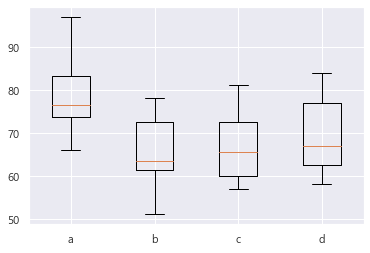

In [20]:
# 이상값 확인 
plot_data = [a,b,c,d]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4],['a','b','c','d'])
plt.grid(True)
plt.show()

In [21]:
# 데이터 프레임 변환 
check = ['a', 'b', 'c', 'd']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수':a+b+c+d, '교육기관':check})
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [22]:
## 정규성 검정 : 자료의 모집단 분포는 정규분포를 따름

# print('정규성을 검정')
# normal_a = shapiro(a)
# normal_b = shapiro(b)
# normal_c = shapiro(c)
# normal_d = shapiro(d)

# print(normal_a)
# print(normal_b)
# print(normal_c)
# print(normal_d)

print(stats.ks_2samp(a, b), stats.ks_2samp(a, c), stats.ks_2samp(a, d), 
      stats.ks_2samp(b, c), stats.ks_2samp(b, d),
      stats.ks_2samp(c, d), sep="\n")


## 등분산성 검정 : 모든 집단의 모분산은 동일함

print('등분산성 검정')
#levene 등분산성 검정
from scipy.stats import levene
print(levene(a,b,c,d))

# bartlett 등분산성 검정
from scipy.stats import bartlett
print(bartlett(a,b,c,d))

#결과 : p-value > 0.05, 등분산성 만족

정규성을 검정
ShapiroResult(statistic=0.9516036510467529, pvalue=0.7273865938186646)
ShapiroResult(statistic=0.9632648825645447, pvalue=0.8405646681785583)
ShapiroResult(statistic=0.8988886475563049, pvalue=0.2823662757873535)
ShapiroResult(statistic=0.93294757604599, pvalue=0.5432827472686768)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
등분산성 검정
LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
BartlettResult(statistic=0.07373983712569482, pvalue=0.9947906337756077)


### 통계량을 이용한 가설 검정 

In [23]:
# F통계량을 이용한 가설 검정 
f_statistic, pval = stats.f_oneway(a,b,c,d)

print('F={0:.1f},p={1:.3f}'.format(f_statistic, pval))

if pval <0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 없다.")

F=3.5,p=0.029
귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


### Statsmodel을 이용한 가설 검정 

-  model = ols('종속변수 ~ 독립변수', data).fit() : model
- sm.stats.anova_lm(model, type=2) : # Type 2 Anova DataFrame

In [24]:
# Statsmodel을 사용한 일원분산분석¶

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols('점수 ~ C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

# data.shape (32,2)
# SSA k-1 = 4-1 =4 
# SSE N-k = 32-4 = 28 
# SST N-1 = 32-1 =31 
# MSA / MSW = 295.083333 / 84.741071 = 3.482176

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [25]:
pval = anova_lm_result['PR(>F)'][0]

if pval < 0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else:
    print("귀무가설 채택, 4개의 교육훈련 기법간이 차이가 없다.")

귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


In [26]:
## 사후분석 : ANOVA 검증 결과 유의미하다는 결론을 얻었을 때, 
##            구체적으로 어떤 수준(들)에서 평균 차이가 나는지를 검증
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha=0.05)
HSD.summary()

# a, b 차이, a,c 차이만 유의함 

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0693,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9,-10.8169,14.3169,False
b,d,4.125,0.7861,-8.4419,16.6919,False
c,d,2.375,0.9,-10.1919,14.9419,False


#### 결론 
#### 교육기관에 따른 weight의 평균 차이는 유의미하였다(F(3, 28) = 4.221093, p < 0.05). 
#### Tukey의 HSD를 이용하여 사후분석을 실시한 결과, a 조건과 b 조건 에서 유의미한 평균 차이가 있었다(p < 0.05).

### 2) 이원분산분석(Two-way ANOVA)
#### 종속변수가 1개, 독립변수가 2개이면서 독립변수 각각이 factor(요인)로서 factor내에 level(수준)을 가지고 있을 때,각 집단의 평균의 유의미한 차이가 있는지 유무를 확인

#### 증명하고자 하는 가설
- 귀무가설 : 강도에 대한 각 판유리와 온도간에는 상호작용효과가 없다 
- 대립가설 : 강도에 대한 각 판유리와 온도간에는 상호작용효과가 없다 

In [27]:
# 종속변수: 강도, 독립변수: 판유리/온도

dat=pd.DataFrame({'판유리':['유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', '유리3',
                            '유리3', '유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', 
                            '유리3', '유리3', '유리1', '유리1', '유리1', '유리2', '유리2', '유리2', 
                            '유리3', '유리3', '유리3'], 
                  '온도':[100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125,
                          125, 125, 125, 125, 150, 150, 150, 150, 150, 150, 150, 150, 150], 
                  '강도':[580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
                          1035, 1000, 1045, 1053, 1066, 1392, 1380, 1386, 1328, 1312, 1299, 867, 
                          904, 889]
                 })

In [28]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [29]:
dat.groupby('판유리').agg(len)

,온도,강도
판유리,,
유리1,9,9
유리2,9,9
유리3,9,9


In [30]:
dat.groupby('온도').agg(len)

,판유리,강도
온도,,
100,9,9
125,9,9
150,9,9


In [31]:
dat.groupby(['판유리', '온도']).agg(len)

# 판유리 온도 요인으로 구분한 각 집단별 표본수는 모두 3로 동일

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [32]:
# 이원 분산 분석 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', dat).fit()
anova_result = pd.DataFrame(anova_lm(model))

In [33]:
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.508645e+05,75432.259259,206.370554,3.886026e-13
C(온도),2.0,1.970335e+06,985167.259259,2695.259499,5.008957e-23
C(판유리):C(온도),4.0,2.905517e+05,72637.925926,198.725707,1.254188e-14
Residual,18.0,6.579333e+03,365.518519,NaN,NaN


#### 결과해석 
- 판유리: F(2, 18) = 206.370554, p < 0.05로 유의미. 즉 판유리의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- 온도: F(2, 18) = 2695.259499, p < 0.05로 유의미. 즉 온도의 수준에 따라 평균에 차이가 난다고 볼 수 있음

- 판유리:온도: F(4, 18) = 198.725707, p < 0.05로 유의미. 상호작용 효과는 발견

In [34]:
## 사후 분석 
dat['온도']=dat['온도'].astype('str')
dat['combi']=dat.판유리 + " / " + dat.온도
print(pairwise_tukeyhsd(dat['강도'], dat['combi']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
유리1 / 100 유리1 / 125  514.6667  0.001  459.9711  569.3623   True
유리1 / 100 유리1 / 150  813.3333  0.001  758.6377  868.0289   True
유리1 / 100 유리2 / 100  -19.6667    0.9  -74.3623   35.0289  False
유리1 / 100 유리2 / 125  462.3333  0.001  407.6377  517.0289   True
유리1 / 100 유리2 / 150  740.3333  0.001  685.6377  795.0289   True
유리1 / 100 유리3 / 100    0.6667    0.9  -54.0289   55.3623  False
유리1 / 100 유리3 / 125     482.0  0.001  427.3044  536.6956   True
유리1 / 100 유리3 / 150     314.0  0.001  259.3044  368.6956   True
유리1 / 125 유리1 / 150  298.6667  0.001  243.9711  353.3623   True
유리1 / 125 유리2 / 100 -534.3333  0.001 -589.0289 -479.6377   True
유리1 / 125 유리2 / 125  -52.3333 0.0671 -107.0289    2.3623  False
유리1 / 125 유리2 / 150  225.6667  0.001  170.9711  280.3623   True
유리1 / 125 유리3 / 100    -514.0  0.001 -56

## 2. 카이제곱 검정 

### 1)적합도 검정(Goodness of Fit)
- k개의 범주 (혹은 계급)을 가지는 한 개의 요인(factor)에 대해서 어떤 이론적 분포를 따르고 있는지를 검정하는 방법
#### stats.chisquare()
- 귀무가설 : 실제분포와 이론적 분포 간에는 차이가 없다. (두 분포가 일치한다.)
- 대립가설 : 실제분포와 이론적 분포 간에는 차이가 있다. (두 분포가 일치하지 않는다.)

In [35]:
#### 적합도 검정 ####
## 데이터 생성
# 4교대 근무, 1일 불량 수 조사, 각조의 불량 수 차이 여부 검정 
observed_, expected_ = [15,35,24,27], [25,25,25,25]
ct_1 = pd.DataFrame([observed_, expected_], columns=["A조","B조","C조","D조",],
                    index=['관측빈도', '기대빈도'])
ct_1

## 카이제곱검정 통계량 계산
observed = ct_1.loc["관측빈도"]
expected = ct_1.loc["기대빈도"]

chi_squared_test = (observed-expected).pow(2)/expected

chi_squared_statistic = chi_squared_test.sum()
print('카이제곱 통계량',chi_squared_statistic) 

## 카이제곱검정 수행(적합도 검정)
dof = (4-1)*(2-1)
chi_ = stats.chi2(dof)
chi_05 = chi_.ppf(0.95)
print('기각역:', chi_05) 

# 카이제곱통계량 기반 검정 
if chi_05 >=  chi_squared_statistic :
    print("귀무가설 채택, 4개조의 불량수는 차이가 없다.")
else :
    print("귀무가설 기각, 4개조의 불량수는 차이가 있다.")

p_val=1-chi_.cdf(chi_squared_statistic)

print('p-value:', p_val) 

# 유의수준 기반 검정 
if p_val >= 0.05:
    print("귀무가설 채택, 4개조의 불량수는 차이가 없다.")
else :
    print("귀무가설 기각, 4개조의 불량수는 차이가 있다.")


## chisquare: 모집단의 분포를 알고 있고, 이에 대해 검증할 때, 활용 package
stats.chisquare(ct_1.loc["관측빈도"].values,f_exp = ct_1.loc["기대빈도"].values)


카이제곱 통계량 8.2
기각역: 7.814727903251179
귀무가설 기각, 4개조의 불량수는 차이가 있다.
p-value: 0.0420541828949661
귀무가설 기각, 4개조의 불량수는 차이가 있다.


Power_divergenceResult(statistic=8.2, pvalue=0.04205418289496614)

### 2)독립성검정(Test of Independence) 

- 모집단을 범주화하는 기준이 되는 두 변수 A,B가 서로 독립적으로 관측값에 영향을 미치는지의 여부를 검정하는 것

#### crosstab() : 교차표 생성 함수 
#### scipy 모듈의 chi2_contingency() : 2개의 범주형 변수에 대한 카이제곱 통계량 계산 

- 귀무가설 : 두 변수 사이에는 연관이 없다. (독립이다.)
- 대립가설 : 두 변수 사이에는 연관이 있다. (종속이다.)

In [36]:
#교차분석 하기 위한 범주형 데이터 정의
cross_data = pd.DataFrame(
                {"영양제":['복용','복용','복용','복용','복용','복용','복용','복용',
                         '복용','복용','복용','복용','복용','복용','복용','복용',
                         '복용','복용','복용','복용',
                         '미복용','미복용','미복용','미복용','미복용','미복용','미복용','미복용',
                         '미복용','미복용','미복용','미복용','미복용','미복용','미복용','미복용',
                         '미복용','미복용','미복용','미복용'], 
                 
                 "감기여부":['유','유','유','유','유','무','무','무','무','무',
                             '무','무','무','무','무','무','무','무','무','무',
                             '유','유','유','유','유','유','유','유','유','유',
                             '유','유','무','무','무','무','무','무','무','무']
                }
)

cross_data.head(5)

,영양제,감기여부
0,복용,유
1,복용,유
2,복용,유
3,복용,유
4,복용,유


In [37]:
# 교차분석표 생성 
## summary 행렬 포함한 교차표 
print(pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=True))

## 계산하기 위한 교차표
data_crosstab = pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=False)

감기여부   무   유  All
영양제              
미복용    8  12   20
복용    15   5   20
All   23  17   40


In [38]:
data_crosstab

감기여부,무,유
영양제,,
미복용,8,12
복용,15,5


In [39]:
#교차표분석 : 카이제곱통계량 산출 
from scipy.stats import chi2_contingency

#correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result = chi2_contingency(observed=data_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result[3]).rename(index={0:'복용', 1:'미복용'}, columns={0:'유', 1:'무'})

if result[0] >= result[1]:
    print("귀무가설 기각, 감기약 복용과 감기 유무는 차이가 있다.")
else :
    print("귀무가설 채택, 감기약 복용과 감기 유무는 차이가 없다.")

1. 카이제곱 통계량: 5.012787723785166
2. p-value: 0.025160759200408785
3. df: 1
4. 기대값 행렬:
귀무가설 기각, 감기약 복용과 감기 유무는 차이가 있다.
